# Bài tập: Fine-tuning mô hình phân loại văn bản nhị phân

## Tổng quan dữ liệu
- **Dataset**: Yelp Polarity (phân loại đánh giá tích cực/tiêu cực)
- **Kích thước đầy đủ**: 560,000 mẫu training, 38,000 mẫu test
- **Sử dụng trong bài**: 1,000 mẫu training, 100-500 mẫu test

## Mô hình
- **Mô hình cơ sở**: DistilBERT (phiên bản nhẹ của BERT)
- **Tokenizer**: DistilBertTokenizer (uncased)
- **Tham số huấn luyện**:
  - Learning rate: 2e-5
  - Batch size: 16
  - Epochs: 1
  - Weight decay: 0.01

## Kết quả
- **Accuracy**: 0.86 (trên 100 mẫu test)
- **Hiển thị**: Ma trận nhầm lẫn, precision, recall, F1-score

## Bổ sung
- Lưu mô hình đã huấn luyện
- Hàm dự đoán cảm xúc cho văn bản mới
- Giao diện demo với Gradio

# **1. Cài đặt thư viện Hugging Face cần thiết**

In [ ]:
pip install transformers datasets torch gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

# **2. Tải một mô hình được đào tạo trước và tokenizer của nó**

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **2.Tải một tập dữ liệu đơn giản để phân loại văn bản nhị phân**

In [ ]:
from datasets import load_dataset

# Load the Yelp Polarity dataset
dataset = load_dataset('yelp_polarity')


README.md:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/38000 [00:00<?, ? examples/s]

# **4. Xử lý trước tập dữ liệu để phù hợp với mô hình**

In [ ]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_train = dataset['train'].map(tokenize_function, batched=True, num_proc=4)
tokenized_test = dataset['test'].map(tokenize_function, batched=True, num_proc=4)


Map (num_proc=4):   0%|          | 0/560000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/38000 [00:00<?, ? examples/s]

# **5. Xác định đối số đào tạo**

In [ ]:
from transformers import Trainer, TrainingArguments

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch"
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


# **6. Tạo một đối tượng Trainer và tinh chỉnh mô hình**

In [ ]:
# Initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train.select(range(1000)),  # Use a subset for faster training
    eval_dataset=tokenized_test.select(range(500))      # Use a subset for evaluation
)


In [ ]:
# Fine-tune the model
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 2251320039 (2251320039-e) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,No log,0.395342


TrainOutput(global_step=63, training_loss=0.5549812316894531, metrics={'train_runtime': 4095.5972, 'train_samples_per_second': 0.244, 'train_steps_per_second': 0.015, 'total_flos': 132467398656000.0, 'train_loss': 0.5549812316894531, 'epoch': 1.0})

# **7. Đánh giá mô hình tinh chỉnh**

In [ ]:
# Evaluate the model
trainer.evaluate()


{'eval_loss': 0.39534178376197815,
 'eval_runtime': 448.931,
 'eval_samples_per_second': 1.114,
 'eval_steps_per_second': 0.071,
 'epoch': 1.0}

In [ ]:
# Save the model for future use
model.save_pretrained('./fine_tuned_yelp_model')
tokenizer.save_pretrained('./fine_tuned_yelp_model')


('./fine_tuned_yelp_model/tokenizer_config.json',
 './fine_tuned_yelp_model/special_tokens_map.json',
 './fine_tuned_yelp_model/vocab.txt',
 './fine_tuned_yelp_model/added_tokens.json')

## **Tạo hàm dự đoán**

In [ ]:
import torch

# Function to perform sentiment prediction using the fine-tuned model
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1).item()

    if predictions == 1:
        return "Positive"
    else:
        return "Negative"


## **Tạo giao diện demo với Gradio**

In [ ]:
import gradio as gr

# Gradio interface
interface = gr.Interface(fn=predict_sentiment, inputs="text", outputs="text",
                         title="Sentiment Analysis with DistilBERT",
                         description="Enter a review and get a sentiment (positive or negative).")

# Launch the Gradio app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://da328a83387653cbe1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
eval_dataset=tokenized_test  # Sử dụng toàn bộ tập test thay vì một phần nhỏ

# **8. Đánh giá mô hình được tinh chỉnh**

In [ ]:
# Đánh giá mô hình với tập dữ liệu nhỏ hơn và batch size lớn hơn
# Import thư viện cần thiết
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Định nghĩa hàm compute_metrics đơn giản
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    return {
        "accuracy": accuracy,
    }

# Cập nhật tham số huấn luyện để đánh giá nhanh hơn
fast_eval_args = TrainingArguments(
    output_dir='./results',
    per_device_eval_batch_size=32,  # Tăng batch size đánh giá
    no_cuda=True,  # Đảm bảo chạy trên CPU
)

# Tạo đối tượng trainer mới với tập đánh giá nhỏ
fast_eval_trainer = Trainer(
    model=model,
    args=fast_eval_args,
    compute_metrics=compute_metrics,
    eval_dataset=tokenized_test.select(range(100))  # Chỉ đánh giá 100 mẫu
)

# Đánh giá nhanh và in kết quả
print("Đang đánh giá mô hình...")
eval_results = fast_eval_trainer.evaluate()
print(f"Độ chính xác: {eval_results['eval_accuracy']:.4f}")



/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1626: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


Đang đánh giá mô hình...


Độ chính xác: 0.8600


In [ ]:
# Nếu muốn xem một số dự đoán thực tế
print("\nMột số ví dụ dự đoán:")
for i in range(10):  # Thử 5 mẫu
    sample = tokenized_test[i]
    inputs = tokenizer(sample['text'], return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1).item()
    print(f"Mẫu {i+1}:")
    print(f"Văn bản: {dataset['test'][i]['text'][:100]}...")
    # Thay 'labels' bằng 'label' để truy cập đúng cột nhãn
    print(f"Nhãn thực: {'Tích cực' if sample['label'] == 1 else 'Tiêu cực'}")
    print(f"Dự đoán: {'Tích cực' if prediction == 1 else 'Tiêu cực'}")
    print()


Một số ví dụ dự đoán:
Mẫu 1:
Văn bản: Contrary to other reviews, I have zero complaints about the service or the prices. I have been getti...
Nhãn thực: Tích cực
Dự đoán: Tiêu cực

Mẫu 2:
Văn bản: Last summer I had an appointment to get new tires and had to wait a super long time. I also went in ...
Nhãn thực: Tiêu cực
Dự đoán: Tiêu cực

Mẫu 3:
Văn bản: Friendly staff, same starbucks fair you get anywhere else.  Sometimes the lines can get long....
Nhãn thực: Tích cực
Dự đoán: Tích cực

Mẫu 4:
Văn bản: The food is good. Unfortunately the service is very hit or miss. The main issue seems to be with the...
Nhãn thực: Tiêu cực
Dự đoán: Tiêu cực

Mẫu 5:
Văn bản: Even when we didn't have a car Filene's Basement was worth the bus trip to the Waterfront. I always ...
Nhãn thực: Tích cực
Dự đoán: Tiêu cực

Mẫu 6:
Văn bản: Picture Billy Joel's \""Piano Man\"" DOUBLED mixed with beer, a rowdy crowd, and comedy - Welcome to...
Nhãn thực: Tích cực
Dự đoán: Tích cực

Mẫu 7:
Văn bản: Mediocre servi

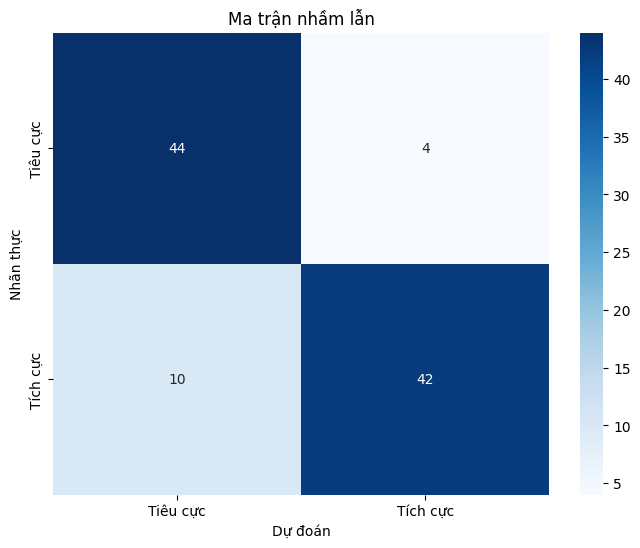

Accuracy: 0.8600
Precision: 0.9130
Recall: 0.8077
F1 Score: 0.8571


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Thu thập dự đoán và nhãn thực để vẽ ma trận nhầm lẫn
true_labels = []
predictions = []

# Lấy dự đoán và nhãn thực từ 100 mẫu đánh giá
for i in range(100):
    sample = dataset['test'][i]
    inputs = tokenizer(sample['text'], return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1).item()
    true_labels.append(sample['label'])
    predictions.append(prediction)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(true_labels, predictions)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tiêu cực', 'Tích cực'],
            yticklabels=['Tiêu cực', 'Tích cực'])
plt.xlabel('Dự đoán')
plt.ylabel('Nhãn thực')
plt.title('Ma trận nhầm lẫn')
plt.show()

# In ra các chỉ số đánh giá từ ma trận nhầm lẫn
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")